In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from functools import reduce

In [2]:
fontsize = 16
lw = 2

In [9]:
path = 'E:/KK/00_DKFZ/Projects/02_Single-Cell/Experiments/KK19 - diaPASEF Ecoli spike-in/DIA-NN 1.8.0/'

percs = ['05', '10', '20']
amounts = ['1', '5', '10', '100']

pr_reports = []
for i in range(4):
    for j in range(3):
        pr_report = pd.read_csv(path + percs[j] + 'perc_MBR/' + amounts[i] + 'ng/HE' + percs[j] 
                             + '_' + amounts[i] + 'ng.pr_matrix.tsv', sep='\t')
        pr_reports.append(pr_report)

pg_reports = []
for i in range(4):
    for j in range(3):
        pg_report = pd.read_csv(path + percs[j] + 'perc_MBR/' + amounts[i] + 'ng/HE' + percs[j] 
                             + '_' + amounts[i] + 'ng.pg_matrix.tsv', sep='\t')
        pg_reports.append(pg_report)
        
reports = [pr_reports, pg_reports] 

In [73]:
peptides = []
proteins = []

for i, report in enumerate(reports):
    
    for j, frame in enumerate(report):
        organisms = []
        
        for row in frame['Protein.Names']:
            elements = [j.split('_')[-1] for j in row.split(';')]
            organisms.append(';'.join(elements))
        
        report[j].loc[:,('Organism')] = organisms
        
        filtered = report[j][~(report[j]['Organism'].str.contains('HUMAN') & report[j]['Organism'].str.contains('ECOLI'))]
        filtered.loc[:,('Organism')] = [r.split(';')[0] for r in filtered['Organism']]
        
        quan_cols = [c for c in filtered if 'Data' in c]
        counts = filtered.groupby('Organism')[quan_cols].count().T
    
        if i == 0:
            peptides.append(counts)
        elif i == 1:
            proteins.append(counts)
            

C:\Users\k689l\AppData\Local\Temp\ipykernel_2780\4042886883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.loc[:,('Organism')] = [r.split(';')[0] for r in filtered['Organism']]
C:\Users\k689l\AppData\Local\Temp\ipykernel_2780\4042886883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.loc[:,('Organism')] = [r.split(';')[0] for r in filtered['Organism']]
C:\Users\k689l\AppData\Local\Temp\ipykernel_2780\4042886883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a cop

C:\Users\k689l\AppData\Local\Temp\ipykernel_2780\4042886883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.loc[:,('Organism')] = [r.split(';')[0] for r in filtered['Organism']]
C:\Users\k689l\AppData\Local\Temp\ipykernel_2780\4042886883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.loc[:,('Organism')] = [r.split(';')[0] for r in filtered['Organism']]
C:\Users\k689l\AppData\Local\Temp\ipykernel_2780\4042886883.py:18: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [204]:
numbers = [peptides, proteins]
for i, frame in enumerate(numbers):
    
    numbers[i] = pd.concat(frame)
    numbers[i].loc[:,('Sum')] = numbers[i]['ECOLI'] + numbers[i]['HUMAN']
    numbers[i].loc[:,('Ec perc')] = numbers[i]['ECOLI'] / numbers[i]['Sum']
    numbers[i].loc[:,('Amount')] = [r.split('_')[7].replace('ng', '') for r in numbers[i].index]
    numbers[i].loc[:,('Spike')] = [r.split('_')[6].split('-')[1].replace('perc', '').replace('05', '5') for r in numbers[i].index]


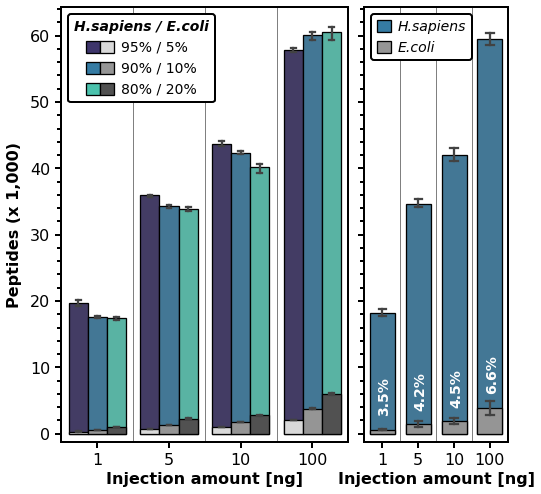

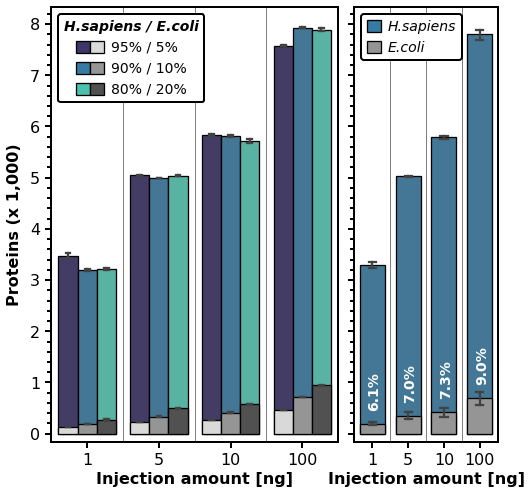

In [203]:
human_colors = sns.color_palette('mako',3)
ecoli_colors = sns.color_palette('Greys',3)
names = ['Peptides', 'Proteins']
for i, frame in enumerate(numbers):
    
    fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharey=True, gridspec_kw={'width_ratios': [2, 1]})
    plt.subplots_adjust(wspace=0.075)
    axs = fig.axes

    sns.barplot(data=frame, x='Amount', y=frame['Sum']/1000, hue='Spike', palette=human_colors, 
                capsize=0.2, edgecolor='k', linewidth=1.3, ax=axs[0])
    sns.barplot(data=frame, x='Amount', y=frame['ECOLI']/1000, hue='Spike', palette=ecoli_colors, 
                capsize=0.2, edgecolor='k', linewidth=1.3, ax=axs[0])
    
    sns.barplot(data=frame, x='Amount', y=frame['Sum']/1000, color=human_colors[1], 
                capsize=0.2, edgecolor='k', linewidth=1.3, width=0.7, ax=axs[1])
    sns.barplot(data=frame, x='Amount', y=frame['ECOLI']/1000, color=ecoli_colors[1], 
                capsize=0.2, edgecolor='k', linewidth=1.3, width=0.7, ax=axs[1])
    
    for ax in axs:
        ax.set_ylim(ymin=max(frame['Sum']/1000)/-50)
        
        ax.set_ylabel('')
        ax.set_xlabel('Injection amount [ng]', fontsize=fontsize, fontweight='bold')

        ax.minorticks_on()
        ax.tick_params(axis='both', which='major', direction='out', pad=5, length=lw*3, width=lw, labelsize=fontsize)
        ax.tick_params(axis='x', which='minor', length=0)
        ax.tick_params(axis='y', which='minor', direction='out', pad=5, length=lw*2, width=lw)

        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(lw)
        
        for j in range(3):
            ax.axvline(x=(j+0.5), linewidth=lw/2, color='grey')
    
    axs[0].set_ylabel(names[i] + ' (x 1,000)', fontsize=fontsize, fontweight='bold', labelpad=8)
 
    h_patches = []
    e_patches = [] 
    patches = []
    for j in range(3):
        h_patches.append(mpl.patches.Patch(facecolor=human_colors[j], edgecolor='black', linewidth=1.3))
        e_patches.append(mpl.patches.Patch(facecolor=ecoli_colors[j], edgecolor='black', linewidth=1.3))
        
    legend = axs[0].legend(title='H.sapiens / E.coli', title_fontproperties=dict(weight='bold', style='italic', size=fontsize-2), 
                           handles=h_patches+e_patches, labels=['', '', '', '95% / 5%', '90% / 10%', '80% / 20%'], 
                           ncol=2, columnspacing=-0.45, handlelength=1, handleheight=1, handletextpad=0.5,
                           fontsize=fontsize-2, edgecolor='k', framealpha=1)
    legend.get_frame().set_linewidth(2)

    legend2 = axs[1].legend(handles=[h_patches[1], e_patches[1]], labels=['H.sapiens', 'E.coli'], ncol=1,
                            handlelength=1, handleheight=1, handletextpad=0.5, fontsize=fontsize, 
                            edgecolor='k', framealpha=1, prop=dict(style='italic', size=fontsize-2)) 
    legend2.get_frame().set_linewidth(2)
         
    xpos = -0.14
    for amount in frame['Amount'].unique():
        e_mean = frame[frame['Amount'] == amount]['ECOLI'].mean()/1000
        ypos = e_mean + max(frame['Sum']/1000)/25
        ratio = frame[frame['Amount'] == amount]['Ec perc'].mean()
        perc = ratio * 100
        
        axs[1].text(xpos, ypos, s="{0:.1f}%".format(perc), fontsize=fontsize-2, rotation=90, color='white', weight='bold')
        xpos += 1

#     plt.savefig('02_Figures/MEs_Numbers_' + names[i] + '.png', dpi=400, bbox_inches='tight')
#     plt.savefig('02_Figures/MEs_Numbers_' + names[i] + '.pdf', dpi=400, bbox_inches='tight')

In [217]:
pep_int_sums = []

for i, frame in enumerate(reports[0]):

    filtered = frame[~(frame['Organism'].str.contains('HUMAN') & report[j]['Organism'].str.contains('ECOLI'))]
    filtered.loc[:,('Organism')] = [r.split(';')[0] for r in filtered['Organism']]
    
    quan_cols = [c for c in filtered if 'Data' in c]
    
    sums = filtered.groupby('Organism')[quan_cols].sum().T
    pep_int_sums.append(np.log10(sums))

pep_int_sums = pd.concat(pep_int_sums)


C:\Users\k689l\AppData\Local\Temp\ipykernel_2780\3897060102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.loc[:,('Organism')] = [r.split(';')[0] for r in filtered['Organism']]
C:\Users\k689l\AppData\Local\Temp\ipykernel_2780\3897060102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered.loc[:,('Organism')] = [r.split(';')[0] for r in filtered['Organism']]
C:\Users\k689l\AppData\Local\Temp\ipykernel_2780\3897060102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [248]:
pep_int_sums.loc[:,('Amount')] = [r.split('_')[7].replace('ng', '') for r in pep_int_sums.index]
pep_int_sums.loc[:,('Spike')] = [r.split('_')[6].split('-')[1].replace('perc', '').replace('05', '5') for r in pep_int_sums.index]

pep_int_sums.loc[:,('Spike Amount')] = pep_int_sums['Amount'].astype(int) * pep_int_sums['Spike'].astype(int)/100
pep_int_sums.loc[:,('Human Amount')] = pep_int_sums['Amount'].astype(int) * (1 - pep_int_sums['Spike'].astype(int)/100)

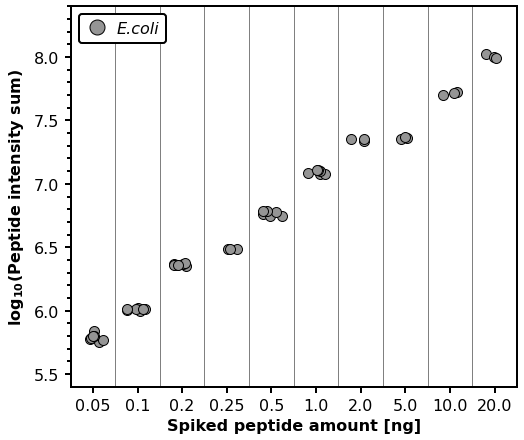

In [252]:
fig, ax = plt.subplots(1, 1, figsize=(8,7))

sns.stripplot(data=pep_int_sums, x='Spike Amount', y='ECOLI', jitter=0.25,  s=10, color=ecoli_colors[1],
              edgecolor='k', linewidth=1, ax=ax)

ax.set_ylim([5.4, 8.4])

ax.set_ylabel('log'+r'$\bf{_{10}}$'+'(Peptide intensity sum)', fontsize=fontsize, fontweight='bold', labelpad=8)
ax.set_xlabel('Spiked peptide amount [ng]', fontsize=fontsize, fontweight='bold', labelpad=5)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', direction='out', pad=5, length=lw*3, width=lw, labelsize=fontsize)
ax.tick_params(axis='x', which='minor', length=0)
ax.tick_params(axis='y', which='minor', direction='out', pad=5, length=lw*2, width=lw)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

pa = mpl.lines.Line2D([0], [0], lw=0, marker='o', color='black', markerfacecolor=ecoli_colors[1], 
                      markersize=15, markeredgewidth=1)
legend = ax.legend(handles=[pa], labels=['E.coli'], prop=dict(style='italic', size=fontsize),
                  handletextpad=0.5, handlelength=1.5, handleheight=1, framealpha=1, edgecolor='k', loc=2)
legend.get_frame().set_linewidth(2)

for i in range(len(pep_int_sums['Spike Amount'].unique())):
    ax.axvline(x=(i+0.5), color='grey', lw=lw/2)

# plt.savefig('02_Figures/MEs_IntensitySum_' + names[0] + '.png', dpi=400, bbox_inches='tight')
# plt.savefig('02_Figures/MEs_IntensitySum_' + names[0] + '.pdf', dpi=400, bbox_inches='tight')